<hr><font color="green"><h1>Document Parser</h1></font>

The pers_alphab function preprocesses Persian text by replacing unwanted characters and mapping Arabic letters to their equivalent Persian letters.

In [1]:
def pers_alphab(line):
    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d]"
    space_pattern = re.compile(space_pattern)
    line = space_pattern.sub(" ", line)
    
    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    line = deleted_pattern.sub("", line)
    
    # in persian literature, there are letters that came from arabic alphabets and can be replaced with 
    # equivalet persian alphabet

    letter_dict = dict()
    letter_dict[u"ۀ"] = u"ه"
    letter_dict[u"ة"] = u"ت"
    letter_dict[u"ي"] = u"ی"
    letter_dict[u"ؤ"] = u"و"
    letter_dict[u"إ"] = u"ا"
    letter_dict[u"ٹ"] = u"ت"
    letter_dict[u"ڈ"] = u"د"
    letter_dict[u"ئ"] = u"ی"
    letter_dict[u"ﻨ"] = u"ن"
    letter_dict[u"ﺠ"] = u"ج"
    letter_dict[u"ﻣ"] = u"م"
    letter_dict[u"ﷲ"] = u""
    letter_dict[u"ﻳ"] = u"ی"
    letter_dict[u"ٻ"] = u"ب"
    letter_dict[u"ٱ"] = u"ا"
    letter_dict[u"ڵ"] = u"ل"
    letter_dict[u"ﭘ"] = u"پ"
    letter_dict[u"ﻪ"] = u"ه"
    letter_dict[u"ﻳ"] = u"ی"
    letter_dict[u"ٻ"] = u"ب"
    letter_dict[u"ں"] = u"ن"
    letter_dict[u"ٶ"] = u"و"
    letter_dict[u"ٲ"] = u"ا"
    letter_dict[u"ہ"] = u"ه"
    letter_dict[u"ﻩ"] = u"ه"
    letter_dict[u"ﻩ"] = u"ه"
    letter_dict[u"ك"] = u"ک"
    letter_dict[u"ﺆ"] = u"و"
    letter_dict[u"أ"] = u"ا"
    letter_dict[u"ﺪ"] = u"د"
    letter_dict[u"ھ"] = u"ه"
    
    # this function replace the keys of letter_dict with its values
    letter_pattern = re.compile(r"(" + "|".join(letter_dict.keys()) + r")")
    line = letter_pattern.sub(lambda x: letter_dict[x.group()], line) 
    
    
    return line

In [1]:
! pip install hazm

     ---------------------------------------- 0.0/232.4 kB ? eta -:--:--
     - -------------------------------------- 10.2/232.4 kB ? eta -:--:--
     ---- -------------------------------- 30.7/232.4 kB 660.6 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/232.4 kB 326.8 kB/s eta 0:00:01
     ----------------- ------------------ 112.6/232.4 kB 656.4 kB/s eta 0:00:01
     ------------------- ---------------- 122.9/232.4 kB 554.9 kB/s eta 0:00:01
     ------------------------------- ---- 204.8/232.4 kB 778.2 kB/s eta 0:00:01
     ------------------------------------ 232.4/232.4 kB 835.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/892.6 kB ? eta -:--:--
   ---------- ----------------------------- 225.3/892.6 kB 4.6 MB/s eta 0:00:01
   ---------- ----------------------------- 235.5/892.6 kB 4.8 MB/s eta 0:00:01
   ----------------- -------------------

The code snippet consists of functions for text preprocessing and segmentation. It starts with stop_word_importer to import Persian stop words. Then, open_normalize_file normalizes text by removing specific characters and stop words. Finally, split_save_txt partitions words into chunks and saves them as separate text files. This code seems intended for preparing text data, possibly for tasks like author classification.

In [4]:
import re
import os
from glob import glob
import hazm

def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

def open_normalize_file(file_path, dlt_line_contains=None, stop_words1=[], stop_words2=[]):
    with open(file_path, 'r', encoding="utf8") as file:
        content = file.read().split('\n')
    if dlt_line_contains is not None: # delete the lines contains specific characters
        new_content = []
        for line in content:
            bad_word_check = [(bad_word in line) for bad_word in dlt_line_contains]
            
            if True not in bad_word_check and re.search(r'[a-zA-Z]', line) is None:
                new_content.append(line)
        content = new_content
        
    content = [pers_alphab(line) for line in content] # clean alphabet and spaces
    
    word_list = [word for line in content for word in (re.split('[\t\s:]+', line))] # tokenizing words
        

    word_list_no_stop1 = [x for x in word_list if x not in stop_words1] # no stop word is in it
    
    word_list_no_stop2 = [x for x in word_list if x not in stop_words2] # no stop word is in it
        
    return word_list,word_list_no_stop1,word_list_no_stop2
        

def split_save_txt(words, dest_path, file_name):
    dest_path = dest_path+file_name+'/'
    os.makedirs(dest_path, exist_ok=True)
    num_chunks = len(words) // 500
    print(f'num_chunks {file_name}',num_chunks)

    for i in range(num_chunks):
        chunk_words = words[i * 500:(i + 1) * 500]
        chunk_text = ' '.join(chunk_words)

        output_file_path = dest_path+f'doc_{i + 1}.txt'
        with open(output_file_path, 'w', encoding="utf8") as output_file:
            output_file.write(chunk_text)

This code segment operates on multiple text files located in the 'Raw_Documents' directory, preprocesses them, and saves the resulting tokens into different directories based on their processing steps. It first imports Persian stop words from two files, then iterates over each text file using the glob function. For each file, it calls the open_normalize_file function to normalize the text, removing lines containing specified words and stop words. The resulting tokens are then split and saved into three different directories: one with stop words retained (norm_with_stop_word), and two without stop words (norm_no_stop_word1 and norm_no_stop_word2). This process prepares the text data for further analysis or natural language processing tasks.

In [ ]:
raw_file_path = 'Raw_Documents/*.txt'
stop_words1 = stop_word_importer('persian_stop_words1.txt') # importing stop words to a list
stop_words2 = stop_word_importer('persian_stop_words2.txt') # importing stop words to a list
bad_words = ['زرعی','آواز پرستوها','مژگان زارع','فاطمه امیری','سایت نگاه دانلود'] # some words inside the texts that is not in the actual story!
for file_path in glob(raw_file_path):
    tokens, tokens_no_stop1, tokens_no_stop2 = open_normalize_file(file_path,
                                                                   dlt_line_contains=bad_words,
                                                                   stop_words1=stop_words1,stop_words2=stop_words2)
    split_save_txt(tokens, f'norm_with_stop_word/', file_path[14:-4])
    split_save_txt(tokens_no_stop1, f'norm_no_stop_word1/', file_path[14:-4])
    split_save_txt(tokens_no_stop2, f'norm_no_stop_word2/', file_path[14:-4])

num_chunks 1 226
num_chunks 1 176
num_chunks 1 107
num_chunks 10 271
num_chunks 10 221
num_chunks 10 124
num_chunks 2 232
num_chunks 2 171
num_chunks 2 76
num_chunks 3 275
num_chunks 3 230
num_chunks 3 144
num_chunks 4 170
num_chunks 4 131
num_chunks 4 66
num_chunks 5 161
num_chunks 5 121
num_chunks 5 66
num_chunks 6 101
num_chunks 6 81
num_chunks 6 48
num_chunks 7 211
num_chunks 7 167
num_chunks 7 90
num_chunks 8 226
num_chunks 8 186
num_chunks 8 112


<hr><font color="blue"><h1>Project</h1></font>

In [3]:
import os

In [4]:
data_dir = 'data'

This code segment reads data from a file named 'Authors.txt', likely containing information about authors and their corresponding books. It initializes empty lists authors and books to store the extracted data, then iterates through the first ten lines of the file, splitting each line into a book title and its author. It appends these values to their respective lists after stripping whitespace. Finally, it returns the extracted authors and books lists.

In [5]:
authors, books = [], []
author_dir = os.path.join(data_dir, 'Authors.txt')
with open(author_dir, 'r', encoding='utf-8') as f:
    lines = f.readlines()
for line in lines[:10]:
    book, author = line.split(':', 1)
    authors += [author.strip()]
    books += [book.strip()]
authors, books

(['فاطمه امیری',
  'نازنین موسوی',
  'زکیه اکبری',
  'مژگان زارع',
  'ساینا مقدسی',
  'نیلوفر شقاقی',
  'محرابه سادات قدیری',
  'خورشید روزبهی',
  'دکتر تورج هاشمی',
  'محمدعلی قجه'],
 ['پلاک پنهان',
  'عسل',
  'تا تلاقی خطوط موازی',
  'خوشبختی های کوچک',
  'دروغی که تمام زندگی ام بود',
  'اگه بدونی',
  'حسرت',
  'راننده سرویس',
  'پیرمرگ',
  'آواز پرستوها'])

In [6]:
def get_author_name(author_id):
    print(authors[author_id])

In [7]:
def get_docs_dir(doc_dir):
    return os.path.join(data_dir, doc_dir)

We will now proceed to train using the 'norm_no_stop_word2' data, necessitating the loading of this dataset.

In [5]:
docs_dir = get_docs_dir('norm_no_stop_word2')

This code snippet aims to load data from multiple text files into the docs and labels lists, representing the text content and corresponding author labels, respectively. It utilizes concurrent execution with ThreadPoolExecutor to speed up the process. For each author, it randomly selects a maximum of max_docs_per_author documents from the folder specified by docs_dir, reads their content, and assigns labels based on the author's ID minus one. The use of ThreadPoolExecutor with multithreading ensures faster execution by concurrently processing data from multiple authors.

In [8]:
import glob
import numpy as np
import concurrent.futures
import threading

In [7]:
max_docs_per_author = 48
docs, labels = [], []
lock = threading.Lock()
def process_author(author_id):
    author_path = os.path.join(docs_dir, str(author_id))
    chosen_files = np.random.choice(glob.glob(os.path.join(author_path, 'doc_*.txt')),
                                     size=max_docs_per_author, replace=False)
    author_docs, author_labels = [], []
    for file_path in chosen_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            author_docs += [content]
            author_labels += [author_id - 1]
    with lock:
        docs.extend(author_docs)
        labels.extend(author_labels)

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_author, author_id) for author_id in range(1, 11)]
    concurrent.futures.wait(futures)

docs = np.array(docs)
labels = np.array(labels)
print(len(docs))
docs[0]

480


'خانم کریمی میگن تصادف جیپ ارتشی صبحی منتقلش تهران بمیرم براش سهیل بریم ملاقاتش سحر بزند گریه زور مقاومت حالی چشمهایش اشک دیدش تار صدای حالش خوبه خانم کریمی متوجه سحر اشپزخانه اره الحمدالله دست پاش شکسته هدیه خانم میگفت روزی کما اهواز منتقلش بیمارستان تهران میگنبهوش اومده ودر ادامه حرفش عصری سهیل میریم ملاقاتش میای سحر میخواست دلیلی خانم کریمی دلیل فراهم زشته نیای خواهر حمیدرضا کوچیکتره سحر اهسته میام اتاقش بازگشت بغض بدی گلویش پیچ تاب میخورد حمید رضا پسرک همسایه همیگشی سحر عادت وقت بهره قطره اشک چکید زانوهایش اغوش کشیدچه حس گنگی نگرانی اضطراب دلتنگی چاشنی فکرش عصر سهیل اماده حالی روبان گلی خریده میرفت میریم خواستگاری خندید سحر حوصله نداشتمیخواست سلامتی اطمینان حاصل خانم کریمی لبخند شالا جعبه شیرینی یخچال اورد سحر کمپوتها بردار سحر سحر اطاعت سهیل کمپوت گل شیرینی زیادن نیستن خانم کریمی اخم حرفیه سهیل رسم همسایگی دردی میخوره حرفها نزن خدایی زبونم لال طوریت بشه دوست دست خالی بیاد ملاقاتت سهیل دست خالی میگم گل کمپوت شیرینی میگم بذاریم باشه خودمون بخوریم خانم کریمی شیکمو خودمون بحث طفل معصو

In [9]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

2024-02-18 00:27:48.275645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 00:27:48.275683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 00:27:48.277019: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 00:27:48.283618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-18 00:27:48.873795: W tensorflow/compiler/tf2

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2024-02-18 00:27:49.967841: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 00:27:50.007844: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 00:27:50.008090: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

This code segment initializes a BERT tokenizer and a pre-trained BERT model for sequence classification using the Persian language model "HooshvareLab/bert-fa-base-uncased". The BertTokenizer.from_pretrained() function initializes the tokenizer with the pre-trained model, while TFBertForSequenceClassification.from_pretrained() initializes the pre-trained BERT model for sequence classification with the specified number of labels (in this case, 10). These components are essential for preprocessing text data and building a neural network model for sequence classification tasks, such as author classification or sentiment analysis, using BERT-based architectures.

In [9]:
tokenizer = BertTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased")
model_pre = TFBertForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels=10)

2024-02-17 19:05:26.704848: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 19:05:28.156789: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 19:05:28.157019: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

This function preprocess_data takes a list of documents (docs) as input and returns a numpy array containing the tokenized and encoded representations of the documents using the BERT tokenizer. It iterates over each document in the input list, tokenizes the text using the tokenizer's encode method, ensuring that special tokens are added, and truncating the text to a maximum length of 500 tokens if necessary. The resulting tokenized representations are stored in a numpy array, which can then be used as input to the BERT model for sequence classification or other downstream tasks.

In [56]:
def preprocess_data(docs):
    return np.array([tokenizer.encode(text, add_special_tokens=True, max_length=500, truncation=True) for text in docs])

In [ ]:
odocs = preprocess_data(docs)

In [11]:
from sklearn.model_selection import train_test_split

This code segment splits the data into training, validation, and test sets using the train_test_split function from scikit-learn. It first splits the entire dataset (odocs and labels) into training and test sets, with the test size set to one-sixth of the entire dataset. Then, it further splits the training set into training and validation subsets, with the validation size set to 20% of the training set. The random state parameter ensures reproducibility of the split. Finally, it prints the lengths of the test, validation, and training sets to verify the proportions of the splits. This process is crucial for evaluating the performance of the model during training and testing phases.

In [13]:
train_texts, test_texts, train_labels, test_labels = train_test_split(odocs, labels, test_size=1/6, random_state=45)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=45)
print(f"test_len: {len(test_labels)}, val_len: {len(val_labels)}, train_len: {len(train_labels)}")

test_len: 80, val_len: 80, train_len: 320


## Model
This code defines a neural network model architecture for sequence classification tasks using a pre-trained BERT model. It begins by creating an input layer with a shape of (500,), indicating the maximum length of input sequences. The dtype is set to tf.int32 to represent integer-encoded tokens.

Next, it freezes the weights of the BERT model's layers by setting trainable attribute to False. This is done to prevent updating the weights of the pre-trained BERT layers during training, as they are already fine-tuned for the task.

The input layer is passed through the BERT model (model_pre), and the output is obtained. As BERT is a transformer model, the output is a tuple containing various elements. [0] is used to select the first element, which typically corresponds to the pooled output or the sequence output, depending on the specific BERT implementation.

Finally, the BERT output is fed into a dense layer with 10 units and a softmax activation function, which converts the output into a probability distribution over the 10 possible classes. The resulting model is then instantiated using tf.keras.Model, with the input layer as the input and the output layer as the output. This model can be trained and evaluated for sequence classification tasks, such as author classification.

In [14]:
input_layer = tf.keras.layers.Input(shape=(500,), dtype=tf.int32)
model_pre.layers[0].trainable = False
bert_output = model_pre(input_layer)[0]
output_layer = tf.keras.layers.Dense(10, activation='softmax')(bert_output)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

This code segment configures the model for training by specifying the optimizer, loss function, and evaluation metric, and then prints a summary of the model architecture.

1. Optimizer Configuration: It uses the Adam optimizer with default parameters by instantiating tf.keras.optimizers.Adam().

2. Loss Function: The sparse categorical cross-entropy loss function is used, which is suitable for multi-class classification tasks with integer-encoded class labels. It is initialized with tf.keras.losses.SparseCategoricalCrossentropy().

3. Evaluation Metric: The model's performance during training will be monitored using sparse categorical accuracy, which computes the accuracy between the true labels and the predicted labels. It is initialized with tf.keras.metrics.SparseCategoricalAccuracy('accuracy').

In [15]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 tf_bert_for_sequence_class  TFSequenceClassifierOut   162849034 
 ification (TFBertForSequen  put(loss=None, logits=(             
 ceClassification)           None, 10),                          
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
Total params: 162849144 (621.22 MB)
Trainable params: 7800 (30.47 KB)
Non-trainable params: 162841344 (621.19 MB)
_________________________________________________________________


## Train Model
The provided code segment prepares the training and validation datasets for training a machine learning model using TensorFlow. The training dataset is constructed from tensor slices of training texts and labels, shuffled with a buffer size of 100, and batched into batches of size 16. Similarly, the validation dataset is created from tensor slices of validation texts and labels, batched into batches of size 16. This choice of batch size is typically based on empirical observations and computational constraints. A batch size of 16 strikes a balance between model convergence speed and memory usage, allowing for efficient training on modern GPU architectures. Additionally, smaller batch sizes can sometimes result in noisy gradients, leading to slower convergence, while larger batch sizes can increase memory consumption and training time. Therefore, a batch size of 16 is often considered a reasonable compromise for training neural networks.

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).shuffle(100).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(16)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15


2024-02-17 19:07:39.883714: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-17 19:07:42.854538: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f84f15e4470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 19:07:42.854564: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-02-17 19:07:42.971604: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-17 19:07:43.217523: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708184263.451510    4186 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - 36s 1s/step - loss: 2.3200 - accuracy: 0.1250 - val_loss: 2.2128 - val_accuracy: 0.3125
Epoch 2/15
20/20 [==============================] - 24s 1s/step - loss: 2.1825 - accuracy: 0.2219 - val_loss: 2.0375 - val_accuracy: 0.4000
Epoch 3/15
20/20 [==============================] - 24s 1s/step - loss: 2.0159 - accuracy: 0.3625 - val_loss: 1.8489 - val_accuracy: 0.4625
Epoch 4/15
20/20 [==============================] - 24s 1s/step - loss: 1.8884 - accuracy: 0.4437 - val_loss: 1.7499 - val_accuracy: 0.5375
Epoch 5/15
20/20 [==============================] - 24s 1s/step - loss: 1.7876 - accuracy: 0.4344 - val_loss: 1.6444 - val_accuracy: 0.6125
Epoch 6/15
20/20 [==============================] - 24s 1s/step - loss: 1.6819 - accuracy: 0.5469 - val_loss: 1.5467 - val_accuracy: 0.7125
Epoch 7/15
20/20 [==============================] - 24s 1s/step - loss: 1.5180 - accuracy: 0.6375 - val_loss: 1.4208 - val_accuracy: 0.7750
Epoch 8/15
20/20 [=============

## Test Model
the model is evaluated on the test dataset using the evaluate method, which computes the test loss and accuracy. The computed test loss and accuracy are then printed to the console for analysis. This process helps assess the generalization performance of the trained model on unseen data, providing valuable insights into its effectiveness and robustness.

In [17]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(16)

test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

5/5 [==============================] - 4s 852ms/step - loss: 0.6915 - accuracy: 0.9250
Test Loss: 0.6915358304977417, Test Accuracy: 0.925000011920929


In [31]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 485.8 kB/s eta 0:00:001m538.3 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 242.6 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 269.3 kB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 310.8 kB/s eta 0:00:000:00:01m eta 0:00:01


Following the model evaluation on the test dataset, the focus now shifts towards implementing methods to measure and analyze the trained model's performance more comprehensively. This phase typically involves various techniques such as generating a confusion matrix to visualize the model's predictions across different classes, plotting accuracy per epoch to observe training trends and convergence behavior, and computing a classification report to obtain detailed metrics such as precision, recall, and F1-score for each class. These analyses provide deeper insights into the model's strengths and weaknesses, helping identify areas for improvement and guiding future iterations of the model training process. By systematically evaluating and interpreting the model's performance metrics, stakeholders can make informed decisions regarding model deployment and optimization strategies.

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [13]:
def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [14]:
def plot_accuracy_per_epoch(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.show()

In [15]:
def print_classification_report(true_labels, predicted_labels):
    report = classification_report(true_labels, predicted_labels, target_names=classes)
    print(report)

In [16]:
classes = [str(i) for i in range(0, 10)]

In [52]:
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

5/5 [==============================] - 4s 839ms/step


In addition to evaluating the model's performance metrics such as accuracy and loss, further analysis is conducted to gain deeper insights into its behavior. Firstly, a confusion matrix is plotted to visualize the distribution of predicted labels compared to the true labels from the test dataset. This provides a comprehensive understanding of the model's classification performance across different classes. Secondly, accuracy per epoch is plotted, depicting the model's training and validation accuracy trends over the course of training epochs. This visualization aids in assessing the model's convergence and generalization capabilities. Lastly, a classification report is generated, presenting detailed metrics including precision, recall, and F1-score for each class, enabling a more granular evaluation of the model's performance across individual classes. Additionally, during model training, both training and validation accuracies steadily increased, reaching approximately 77.5% and 82.5%, respectively, after 20 epochs. Subsequently, on the test dataset, the model achieved a test loss of approximately 0.692 and a test accuracy of approximately 92.5%, demonstrating its robust performance on unseen data. These comprehensive analyses contribute to a thorough assessment of the trained model's efficacy and inform potential optimization strategies for future iterations.

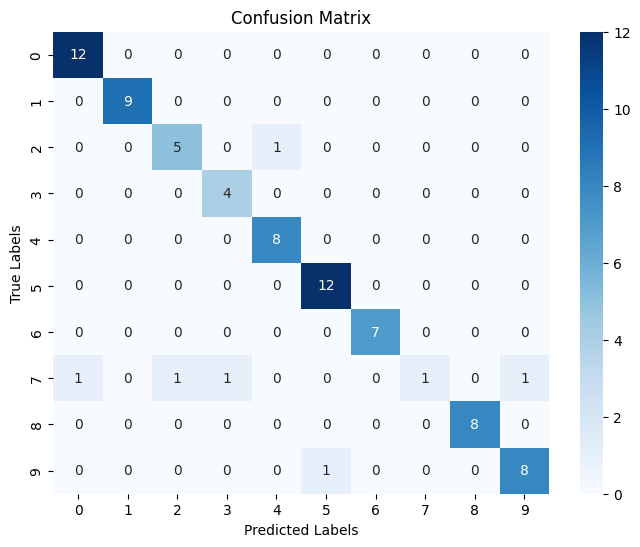

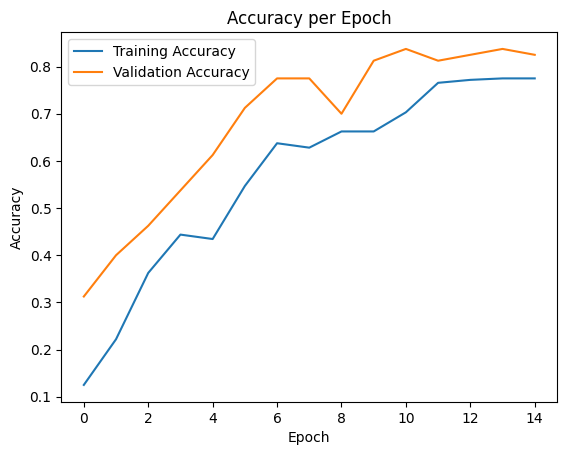

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00         9
           2       0.83      0.83      0.83         6
           3       0.80      1.00      0.89         4
           4       0.89      1.00      0.94         8
           5       0.92      1.00      0.96        12
           6       1.00      1.00      1.00         7
           7       1.00      0.20      0.33         5
           8       1.00      1.00      1.00         8
           9       0.89      0.89      0.89         9

    accuracy                           0.93        80
   macro avg       0.93      0.89      0.88        80
weighted avg       0.93      0.93      0.91        80



In [55]:
plot_confusion_matrix(test_labels, predicted_labels)
plot_accuracy_per_epoch(history)
print_classification_report(test_labels, predicted_labels)

In [ ]:
del model
del model_pre

# Author Classification
Now, we are creating a class that facilitates testing the model with various architectures and parameters to identify optimal configurations.

In [17]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay
import gc

The AuthorClassification class is designed to facilitate author classification tasks using BERT-based models. Upon initialization, it takes parameters such as the directory of documents (docs_dir), the name of the BERT model to be used (model_name), and various hyperparameters like the maximum number of documents per author (max_docs_per_author), the maximum length of a document (max_length_doc), the number of authors (num_authors), and the number of folds for cross-validation (fold). Additionally, it allows the user to configure batch size (batch_size), initial learning rate (initial_learning_rate), end learning rate (end_learning_rate), and the choice of using a learning rate scheduler (need_scheduler).

The class includes methods to load data, preprocess it, create a BERT-based classification model, train the model, evaluate its performance, perform cross-validation, and test-train the model. The set_config() method allows users to dynamically set configuration parameters. The load_data() method preprocesses and loads documents and their corresponding labels, with multithreading for efficiency. The preprocess_data() method tokenizes and encodes the text data using the BERT tokenizer. The create_model() method constructs the classification model architecture using a pre-trained BERT model and additional layers. The train_model() method trains the model using the specified training data and evaluates it on validation data. The evaluate_model() method evaluates the model's performance on test data. The cross_validate() method performs k-fold cross-validation to assess the model's robustness. The test_train() method trains the model on a specified number of epochs and evaluates it on test data, displaying evaluation metrics and visualizations.

Furthermore, the class offers flexibility by allowing users to adjust learning rate scheduling, batch size, and other hyperparameters to optimize model performance. This versatility enables experimentation with different configurations to find the most effective setup for author classification tasks.

In [17]:
class AuthorClassification:
  def __init__(self, docs_dir, model_name, max_docs_per_author=48, max_length_doc=500, fold=5, num_authors=10, batch_size=16, initial_learning_rate= 0.1, end_learning_rate=1e-3, need_scheduler=True, use_dropout=False):
    self.docs_dir = get_docs_dir(docs_dir)
    self.max_docs_per_author = max_docs_per_author
    self.model_name = model_name
    self.max_length_doc = max_length_doc
    self.fold = fold
    self.num_authors = num_authors
    self.set_config(batch_size, initial_learning_rate, end_learning_rate, need_scheduler, use_dropout)
    self.docs, self.labels = self.load_data()

  def set_config(self, batch_size=16, initial_learning_rate= 0.1, end_learning_rate=1e-3, need_scheduler=True, use_dropout=False):
    self.batch_size = batch_size
    self.initial_learning_rate = initial_learning_rate
    self.end_learning_rate = end_learning_rate
    self.need_scheduler = need_scheduler
    self.use_dropout = use_dropout
    
  def load_data(self):
    docs, labels = [], []
    lock = threading.Lock()

    def process_author(author_id):
        author_path = os.path.join(self.docs_dir, str(author_id))
        chosen_files = np.random.choice(glob.glob(os.path.join(author_path, 'doc_*.txt')),
                                          size=self.max_docs_per_author, replace=False)
        author_docs, author_labels = [], []
        for file_path in chosen_files:
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                author_docs += [content]
                author_labels += [author_id - 1]
        with lock:
            docs.extend(author_docs)
            labels.extend(author_labels)

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_author, author_id) for author_id in range(1, self.num_authors + 1)]
        concurrent.futures.wait(futures)
        
    docs = self.preprocess_data(docs)

    shuffled_indices = np.random.permutation(len(docs))
    docs = np.array(docs)[shuffled_indices]
    labels = np.array(labels)[shuffled_indices]

    return docs, labels

  def preprocess_data(self, docs):
    tokenizer = BertTokenizer.from_pretrained(self.model_name)
    return np.array([tokenizer.encode(text, add_special_tokens=True, max_length=self.max_length_doc, truncation=True) for text in docs])

  def create_model(self):
      input_layer = tf.keras.layers.Input(shape=(self.max_length_doc,), dtype=tf.int32)
      model_pre = TFBertForSequenceClassification.from_pretrained(self.model_name, num_labels=self.num_authors)
      model_pre.layers[0].trainable = False
      bert_output = model_pre(input_layer)[0]
      if self.use_dropout:
          bert_output = tf.keras.layers.Dropout(0.1)(bert_output)
      output_layer = tf.keras.layers.Dense(self.num_authors, activation='softmax')(bert_output)
      model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
      return model

  def train_model(self, model, train_texts, train_labels, val_texts, val_labels, epochs):
    train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).shuffle(100).batch(self.batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(self.batch_size)
      
    total_steps = (len(self.labels) // self.batch_size) * epochs
    if self.need_scheduler:
        lr = PolynomialDecay(
            initial_learning_rate=self.initial_learning_rate,
            decay_steps=total_steps,
            end_learning_rate=self.end_learning_rate,
            power=1.0
        )
    else:
        lr = self.end_learning_rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
    return model, history

  def evaluate_model(self, model, test_texts, test_labels):
    test_dataset = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(self.batch_size)
    test_loss, test_accuracy = model.evaluate(test_dataset)
    return test_loss, test_accuracy

  def test_train(self, epochs):
    tf.keras.backend.clear_session()
    gc.collect()
    train_texts, test_texts, train_labels, test_labels = train_test_split(self.docs, self.labels, test_size=1/6, random_state=45)
    train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=45)
    print(f"test_len: {len(test_labels)}, val_len: {len(val_labels)}, train_len: {len(train_labels)}")

    model = self.create_model()
    model, history = self.train_model(model, train_texts, train_labels, val_texts, val_labels, epochs)
    test_dataset = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(self.batch_size)
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)

    plot_confusion_matrix(test_labels, predicted_labels)
    plot_accuracy_per_epoch(history)
    print_classification_report(test_labels, predicted_labels)
    del model
    
  def cross_validate(self, epochs=10):
    fold_size = len(self.labels) // self.fold
    accuracies = []

    for i in range(self.fold):
      tf.keras.backend.clear_session()
      gc.collect()
      start_index = i * fold_size
      end_index = min(start_index + fold_size, len(self.labels))
    
      val_texts = self.docs[start_index:end_index]
      val_labels = self.labels[start_index:end_index]
      train_texts = np.concatenate((self.docs[:start_index], self.docs[end_index:]), axis=0)
      train_labels = np.concatenate((self.labels[:start_index], self.labels[end_index:]), axis=0)
      model = self.create_model()
      print(f"Fold {i+1}/{self.fold}")

      model, history = self.train_model(model, train_texts, train_labels, val_texts, val_labels, epochs=epochs)
    
      test_loss, test_accuracy = self.evaluate_model(model, val_texts, val_labels)
      accuracies.append(test_accuracy)
      print(f"Validation Accuracy: {test_accuracy}")
      del model

    print("Mean Accuracy:", np.mean(accuracies))

Based on previous testing, it became evident that training and evaluating the model using the specified settings could be time-consuming. To address this issue and expedite the training process, it was imperative to determine the optimal learning rate. By employing a learning rate scheduler, the learning rate dynamically adjusts during training, starting with a relatively high value and gradually decreasing over time. This approach aims to strike a balance between rapid initial learning and fine-tuning of the model's parameters. As observed from prior experiences, adopting this strategy has led to faster convergence and the attainment of desired accuracy within a significantly reduced number of epochs, thereby streamlining the training process and enhancing efficiency.

Initially, we conduct model testing to ensure its functionality and identify optimal values for the initial and end learning rates.

In [19]:
author_classifier = AuthorClassification(docs_dir = 'norm_no_stop_word2',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=500,
                                         fold=5,
                                         initial_learning_rate= 0.1, 
                                         end_learning_rate=1e-3)

test_len: 80, val_len: 80, train_len: 320


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
20/20 [==============================] - 31s 1s/step - loss: 51.3364 - accuracy: 0.1187 - val_loss: 47.9061 - val_accuracy: 0.2375
Epoch 2/6
20/20 [==============================] - 24s 1s/step - loss: 15.3013 - accuracy: 0.2875 - val_loss: 11.2064 - val_accuracy: 0.2750
Epoch 3/6
20/20 [==============================] - 24s 1s/step - loss: 5.1203 - accuracy: 0.4250 - val_loss: 2.6806 - val_accuracy: 0.5000
Epoch 4/6
20/20 [==============================] - 24s 1s/step - loss: 1.3378 - accuracy: 0.6562 - val_loss: 0.6459 - val_accuracy: 0.7500
Epoch 5/6
20/20 [==============================] - 24s 1s/step - loss: 0.7798 - accuracy: 0.7531 - val_loss: 0.7000 - val_accuracy: 0.8375
Epoch 6/6
5/5 [==============================] - 4s 853ms/step - loss: 0.6442 - accuracy: 0.8375
Test Loss: 0.6441607475280762, Test Accuracy: 0.8374999761581421
5/5 [==============================] - 6s 850ms/step


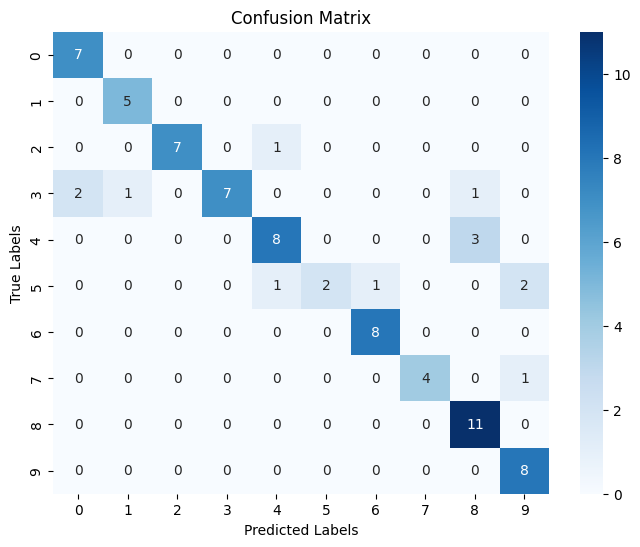

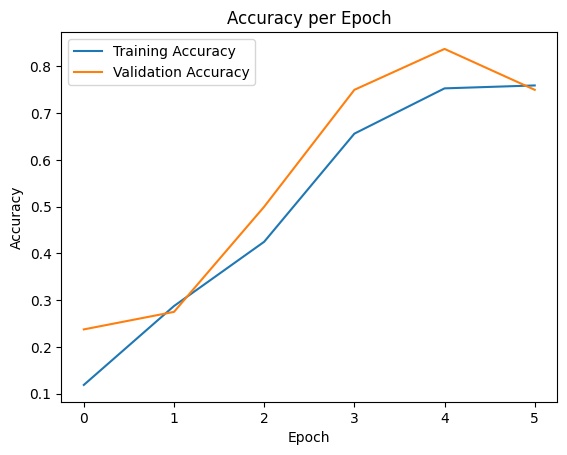

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.83      1.00      0.91         5
           2       1.00      0.88      0.93         8
           3       1.00      0.64      0.78        11
           4       0.80      0.73      0.76        11
           5       1.00      0.33      0.50         6
           6       0.89      1.00      0.94         8
           7       1.00      0.80      0.89         5
           8       0.73      1.00      0.85        11
           9       0.73      1.00      0.84         8

    accuracy                           0.84        80
   macro avg       0.88      0.84      0.83        80
weighted avg       0.87      0.84      0.83        80



In [20]:
author_classifier.test_train(6)

Based on our findings, after training for a short duration, we achieved promising results with a training accuracy of approximately 75.94% and a validation accuracy of 75%. Furthermore, during testing, our model exhibited a test accuracy of 83.75%, indicating its effectiveness even with limited training epochs.

We proceeded to test the model with lower initial and end learning rates to assess whether this adjustment would lead to improved performance.

In [15]:
author_classifier = AuthorClassification(docs_dir = 'norm_no_stop_word2',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=500,
                                         fold=5,
                                         initial_learning_rate= 0.01, 
                                         end_learning_rate=1e-4,
                                         batch_size=16)

test_len: 80, val_len: 80, train_len: 320


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
20/20 [==============================] - 31s 1s/step - loss: 3.2267 - accuracy: 0.2062 - val_loss: 1.9736 - val_accuracy: 0.3750
Epoch 2/6
20/20 [==============================] - 24s 1s/step - loss: 1.6985 - accuracy: 0.4094 - val_loss: 1.4810 - val_accuracy: 0.3625
Epoch 3/6
20/20 [==============================] - 24s 1s/step - loss: 1.2063 - accuracy: 0.5969 - val_loss: 1.1152 - val_accuracy: 0.6875
Epoch 4/6
20/20 [==============================] - 24s 1s/step - loss: 0.9529 - accuracy: 0.7031 - val_loss: 0.8523 - val_accuracy: 0.7125
Epoch 5/6
20/20 [==============================] - 24s 1s/step - loss: 0.8026 - accuracy: 0.7531 - val_loss: 0.6095 - val_accuracy: 0.8875
Epoch 6/6
5/5 [==============================] - 4s 851ms/step - loss: 0.5987 - accuracy: 0.9125
Test Loss: 0.5987037420272827, Test Accuracy: 0.9125000238418579
5/5 [==============================] - 6s 867ms/step


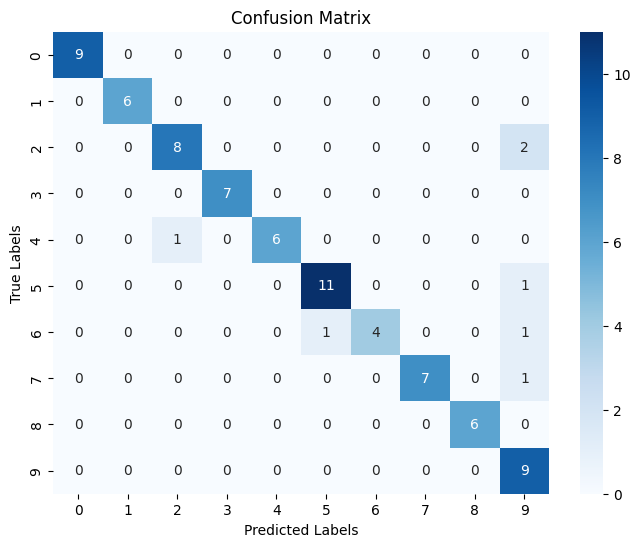

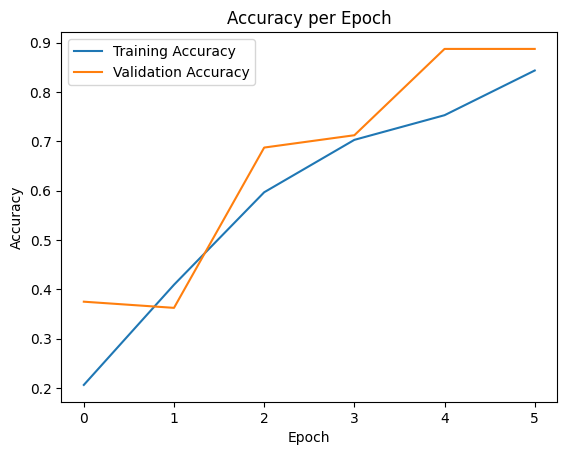

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       0.89      0.80      0.84        10
           3       1.00      1.00      1.00         7
           4       1.00      0.86      0.92         7
           5       0.92      0.92      0.92        12
           6       1.00      0.67      0.80         6
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         6
           9       0.64      1.00      0.78         9

    accuracy                           0.91        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.93      0.91      0.91        80



In [23]:
author_classifier.test_train(6)

The updated results show an improvement in both training and validation accuracy, indicating that the lower initial and end learning rates have indeed enhanced the model's performance. Therefore, it is advisable to utilize these values for better training outcomes.

Now, we proceed with cross-validation to assess the model's performance under real-world conditions and obtain more reliable results.

In [16]:
author_classifier.cross_validate(5)

2024-02-17 21:36:01.617050: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 21:36:01.617291: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 21:36:01.617470: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Fold 1/5


2024-02-17 21:36:05.673112: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Epoch 1/5


2024-02-17 21:36:14.398621: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f357d449cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 21:36:14.398647: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-02-17 21:36:14.403901: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-17 21:36:14.417686: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708193174.490086   19671 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 [==============================] - 37s 1s/step - loss: 3.1782 - accuracy: 0.1875 - val_loss: 1.8799 - val_accuracy: 0.3229
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.7232 - accuracy: 0.3568 - val_loss: 1.3959 - val_accuracy: 0.4062
Epoch 3/5
24/24 [==============================] - 28s 1s/step - loss: 1.2080 - accuracy: 0.6016 - val_loss: 1.0464 - val_accuracy: 0.7708
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.9720 - accuracy: 0.7214 - val_loss: 0.8529 - val_accuracy: 0.8125
Epoch 5/5
6/6 [==============================] - 5s 853ms/step - loss: 0.7442 - accuracy: 0.8438
Validation Accuracy: 0.84375


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 2/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 3.2253 - accuracy: 0.1615 - val_loss: 2.1826 - val_accuracy: 0.2396
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.5527 - accuracy: 0.4583 - val_loss: 1.0161 - val_accuracy: 0.7083
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.0737 - accuracy: 0.6641 - val_loss: 0.7976 - val_accuracy: 0.8646
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.9658 - accuracy: 0.7214 - val_loss: 0.7831 - val_accuracy: 0.7604
Epoch 5/5
6/6 [==============================] - 5s 862ms/step - loss: 0.6189 - accuracy: 0.8750
Validation Accuracy: 0.875


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 3/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 3.5047 - accuracy: 0.1693 - val_loss: 2.5371 - val_accuracy: 0.2188
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.7527 - accuracy: 0.4062 - val_loss: 1.3502 - val_accuracy: 0.5312
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.2559 - accuracy: 0.5807 - val_loss: 1.0315 - val_accuracy: 0.6042
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 1.0059 - accuracy: 0.7135 - val_loss: 0.7429 - val_accuracy: 0.9062
Epoch 5/5
6/6 [==============================] - 5s 858ms/step - loss: 0.7329 - accuracy: 0.8854
Validation Accuracy: 0.8854166865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 4/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 3.4752 - accuracy: 0.2057 - val_loss: 1.6184 - val_accuracy: 0.2396
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.3925 - accuracy: 0.5052 - val_loss: 1.1409 - val_accuracy: 0.6146
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 0.9338 - accuracy: 0.7474 - val_loss: 0.7471 - val_accuracy: 0.8333
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.7975 - accuracy: 0.7734 - val_loss: 0.6325 - val_accuracy: 0.8438
Epoch 5/5
6/6 [==============================] - 5s 857ms/step - loss: 0.6455 - accuracy: 0.8542
Validation Accuracy: 0.8541666865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 5/5
Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 2.9528 - accuracy: 0.1849 - val_loss: 1.9875 - val_accuracy: 0.2083
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.4958 - accuracy: 0.4974 - val_loss: 1.0590 - val_accuracy: 0.8021
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.1697 - accuracy: 0.6458 - val_loss: 0.8513 - val_accuracy: 0.8125
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.8565 - accuracy: 0.7812 - val_loss: 0.6708 - val_accuracy: 0.9167
Epoch 5/5
6/6 [==============================] - 5s 867ms/step - loss: 0.5795 - accuracy: 0.9271
Validation Accuracy: 0.9270833134651184
Mean Accuracy: 0.8770833373069763


Based on just 5 epochs for each fold, we achieved a highly promising mean accuracy of 0.88, highlighting the efficiency of pretrained models in rapidly training and accurately predicting real-world tasks.

Now we are testing the model on norm_no_stop_word1, which contains more stop words and closely resembles the original documents, to compare the results with norm_no_stop_word2 and determine if removing stop words improves our model's performance.

In [19]:
author_classifier = AuthorClassification(docs_dir = 'norm_no_stop_word1',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=500,
                                         fold=5,
                                         initial_learning_rate= 0.01, 
                                         end_learning_rate=1e-4,
                                         batch_size=16)

test_len: 80, val_len: 80, train_len: 320


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
20/20 [==============================] - 32s 1s/step - loss: 3.8678 - accuracy: 0.2000 - val_loss: 1.8752 - val_accuracy: 0.3250
Epoch 2/6
20/20 [==============================] - 24s 1s/step - loss: 1.5450 - accuracy: 0.4812 - val_loss: 1.1775 - val_accuracy: 0.6750
Epoch 3/6
20/20 [==============================] - 24s 1s/step - loss: 1.1599 - accuracy: 0.6375 - val_loss: 0.9291 - val_accuracy: 0.7375
Epoch 4/6
20/20 [==============================] - 24s 1s/step - loss: 0.9312 - accuracy: 0.7406 - val_loss: 0.8714 - val_accuracy: 0.7000
Epoch 5/6
20/20 [==============================] - 24s 1s/step - loss: 0.8166 - accuracy: 0.7312 - val_loss: 0.7699 - val_accuracy: 0.7500
Epoch 6/6
5/5 [==============================] - 4s 854ms/step - loss: 0.5580 - accuracy: 0.9000
Test Loss: 0.558024525642395, Test Accuracy: 0.8999999761581421
5/5 [==============================] - 6s 850ms/step


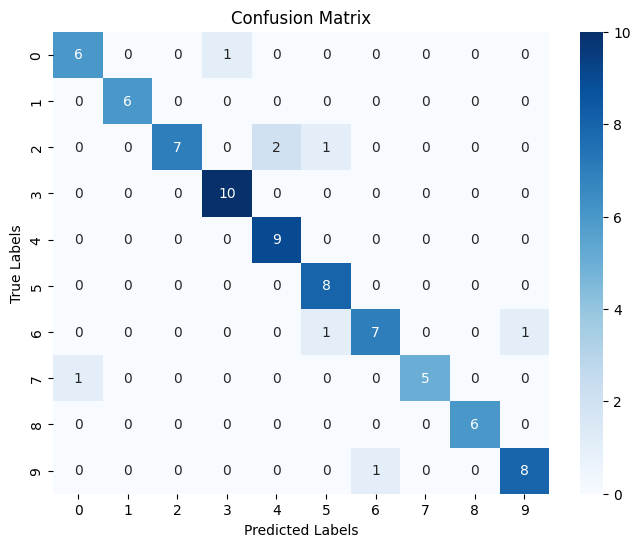

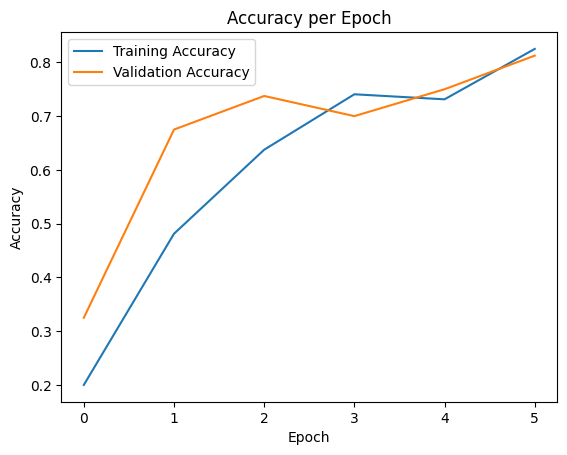

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       1.00      1.00      1.00         6
           2       1.00      0.70      0.82        10
           3       0.91      1.00      0.95        10
           4       0.82      1.00      0.90         9
           5       0.80      1.00      0.89         8
           6       0.88      0.78      0.82         9
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         6
           9       0.89      0.89      0.89         9

    accuracy                           0.90        80
   macro avg       0.91      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80



In [20]:
author_classifier.test_train(6)

In [21]:
author_classifier.cross_validate(5)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 1/5
Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 3.0359 - accuracy: 0.2161 - val_loss: 1.6863 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 28s 1s/step - loss: 1.4960 - accuracy: 0.4661 - val_loss: 1.1543 - val_accuracy: 0.5938
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.0459 - accuracy: 0.6667 - val_loss: 0.8644 - val_accuracy: 0.7500
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.8706 - accuracy: 0.7656 - val_loss: 0.7322 - val_accuracy: 0.8333
Epoch 5/5
6/6 [==============================] - 5s 859ms/step - loss: 0.6389 - accuracy: 0.8646
Validation Accuracy: 0.8645833134651184


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 2/5
Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 2.8367 - accuracy: 0.2266 - val_loss: 1.7083 - val_accuracy: 0.4792
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.3809 - accuracy: 0.5365 - val_loss: 1.0627 - val_accuracy: 0.6771
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.0598 - accuracy: 0.6719 - val_loss: 0.7797 - val_accuracy: 0.7812
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.8721 - accuracy: 0.7344 - val_loss: 0.8824 - val_accuracy: 0.6979
Epoch 5/5
6/6 [==============================] - 5s 879ms/step - loss: 0.5627 - accuracy: 0.8854
Validation Accuracy: 0.8854166865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 3/5
Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 2.6672 - accuracy: 0.2292 - val_loss: 1.9367 - val_accuracy: 0.2083
Epoch 2/5
24/24 [==============================] - 28s 1s/step - loss: 1.3749 - accuracy: 0.5417 - val_loss: 1.3353 - val_accuracy: 0.5312
Epoch 3/5
24/24 [==============================] - 28s 1s/step - loss: 1.0321 - accuracy: 0.7031 - val_loss: 0.8071 - val_accuracy: 0.8021
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.7381 - accuracy: 0.8099 - val_loss: 0.7469 - val_accuracy: 0.7917
Epoch 5/5
6/6 [==============================] - 5s 853ms/step - loss: 0.6522 - accuracy: 0.8125
Validation Accuracy: 0.8125


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 4/5
Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 3.0159 - accuracy: 0.2240 - val_loss: 1.6977 - val_accuracy: 0.3854
Epoch 2/5
24/24 [==============================] - 28s 1s/step - loss: 1.3569 - accuracy: 0.5417 - val_loss: 1.2898 - val_accuracy: 0.4792
Epoch 3/5
24/24 [==============================] - 28s 1s/step - loss: 1.0869 - accuracy: 0.6224 - val_loss: 0.9236 - val_accuracy: 0.6667
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.9561 - accuracy: 0.6771 - val_loss: 0.6989 - val_accuracy: 0.7708
Epoch 5/5
6/6 [==============================] - 5s 858ms/step - loss: 0.5696 - accuracy: 0.8854
Validation Accuracy: 0.8854166865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 5/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 2.9254 - accuracy: 0.2161 - val_loss: 1.8771 - val_accuracy: 0.3229
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.6496 - accuracy: 0.4505 - val_loss: 1.4000 - val_accuracy: 0.4688
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.2356 - accuracy: 0.6120 - val_loss: 1.1238 - val_accuracy: 0.6667
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.9874 - accuracy: 0.6953 - val_loss: 0.9163 - val_accuracy: 0.6875
Epoch 5/5
6/6 [==============================] - 5s 859ms/step - loss: 0.8129 - accuracy: 0.7188
Validation Accuracy: 0.71875
Mean Accuracy: 0.8333333373069763


The comparison between the performance on the norm_no_stop_word1 dataset, which contains more stop words, and the norm_no_stop_word2 dataset revealed a mean accuracy of 0.83. This result indicates a noticeable decrease in performance compared to the norm_no_stop_word2 dataset, where stop words were removed. It suggests that the removal of stop words contributes positively to the model's ability to discern authorship patterns in text.

Now, we are investigating whether we can achieve satisfactory results without employing a learning rate scheduler. (learning rate = 0.001)

In [31]:
author_classifier = AuthorClassification(docs_dir = 'norm_no_stop_word2',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=500,
                                         fold=5,
                                         initial_learning_rate= 1e-3, 
                                         need_scheduler = False,
                                         batch_size=16)

In [17]:
author_classifier.cross_validate(5)

2024-02-17 22:26:06.299038: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 22:26:06.299272: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 22:26:06.299448: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Fold 1/5
Epoch 1/5


2024-02-17 22:26:17.120909: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-17 22:26:18.989175: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fac76c1fad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 22:26:18.989201: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-02-17 22:26:18.994410: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-17 22:26:19.008674: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708196179.083161   26007 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 [==============================] - 38s 1s/step - loss: 2.2498 - accuracy: 0.2031 - val_loss: 2.1671 - val_accuracy: 0.2604
Epoch 2/5
24/24 [==============================] - 28s 1s/step - loss: 2.0420 - accuracy: 0.3021 - val_loss: 2.0420 - val_accuracy: 0.3958
Epoch 3/5
24/24 [==============================] - 28s 1s/step - loss: 1.8581 - accuracy: 0.4453 - val_loss: 1.8098 - val_accuracy: 0.3438
Epoch 4/5
24/24 [==============================] - 28s 1s/step - loss: 1.7276 - accuracy: 0.4766 - val_loss: 1.6386 - val_accuracy: 0.6146
Epoch 5/5
6/6 [==============================] - 5s 851ms/step - loss: 1.5125 - accuracy: 0.5521
Validation Accuracy: 0.5520833134651184


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 2/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 2.2557 - accuracy: 0.1536 - val_loss: 2.1126 - val_accuracy: 0.3854
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 2.0294 - accuracy: 0.3620 - val_loss: 1.8850 - val_accuracy: 0.5104
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.8936 - accuracy: 0.4062 - val_loss: 1.6791 - val_accuracy: 0.5833
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 1.7383 - accuracy: 0.5130 - val_loss: 1.5445 - val_accuracy: 0.6458
Epoch 5/5
6/6 [==============================] - 5s 857ms/step - loss: 1.4083 - accuracy: 0.6979
Validation Accuracy: 0.6979166865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 3/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 2.3237 - accuracy: 0.1432 - val_loss: 2.1159 - val_accuracy: 0.2812
Epoch 2/5
24/24 [==============================] - 30s 1s/step - loss: 2.0561 - accuracy: 0.2812 - val_loss: 1.9250 - val_accuracy: 0.3646
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.8703 - accuracy: 0.3828 - val_loss: 1.7337 - val_accuracy: 0.5000
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 1.7073 - accuracy: 0.5000 - val_loss: 1.6412 - val_accuracy: 0.5417
Epoch 5/5
6/6 [==============================] - 5s 915ms/step - loss: 1.5065 - accuracy: 0.5417
Validation Accuracy: 0.5416666865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 4/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 2.2644 - accuracy: 0.1432 - val_loss: 2.1935 - val_accuracy: 0.1354
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 2.0525 - accuracy: 0.3099 - val_loss: 1.9866 - val_accuracy: 0.3542
Epoch 3/5
24/24 [==============================] - 30s 1s/step - loss: 1.8420 - accuracy: 0.4167 - val_loss: 1.7351 - val_accuracy: 0.5938
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 1.6926 - accuracy: 0.4740 - val_loss: 1.5830 - val_accuracy: 0.5938
Epoch 5/5
6/6 [==============================] - 5s 859ms/step - loss: 1.5025 - accuracy: 0.5417
Validation Accuracy: 0.5416666865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 5/5
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 2.2955 - accuracy: 0.1328 - val_loss: 2.1807 - val_accuracy: 0.1042
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 2.0984 - accuracy: 0.2708 - val_loss: 1.9806 - val_accuracy: 0.3646
Epoch 3/5
24/24 [==============================] - 29s 1s/step - loss: 1.9259 - accuracy: 0.3984 - val_loss: 1.9107 - val_accuracy: 0.3646
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 1.7850 - accuracy: 0.5286 - val_loss: 1.6540 - val_accuracy: 0.6979
Epoch 5/5
6/6 [==============================] - 5s 866ms/step - loss: 1.5057 - accuracy: 0.7500
Validation Accuracy: 0.75
Mean Accuracy: 0.6166666746139526


We obtained a mean accuracy of 0.62, significantly lower than our previous results with the learning rate scheduler. This outcome underscores the efficacy of our method in facilitating better model training.

We have conducted further tests without the learning rate scheduler, varying the learning rate, to confirm the validity of our previous findings regarding the effectiveness of the scheduler across different learning rates.

In [18]:
author_classifier = AuthorClassification(docs_dir = 'norm_no_stop_word2',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=500,
                                         fold=5,
                                         initial_learning_rate= 0.01, 
                                         end_learning_rate=1e-4,
                                         batch_size=16)

In [19]:
author_classifier.cross_validate(5)

2024-02-17 22:52:18.042712: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 22:52:18.042932: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 22:52:18.043109: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Fold 1/5


2024-02-17 22:52:22.092047: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Epoch 1/5


2024-02-17 22:52:30.569562: I external/local_xla/xla/service/service.cc:168] XLA service 0xde944b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 22:52:30.569585: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-02-17 22:52:30.575353: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-17 22:52:30.590644: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708197750.664926   29224 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 [==============================] - 31s 966ms/step - loss: 2.9815 - accuracy: 0.1667 - val_loss: 1.5992 - val_accuracy: 0.4583
Epoch 2/5
24/24 [==============================] - 21s 901ms/step - loss: 1.4590 - accuracy: 0.5104 - val_loss: 1.0020 - val_accuracy: 0.6979
Epoch 3/5
24/24 [==============================] - 21s 892ms/step - loss: 1.1255 - accuracy: 0.6484 - val_loss: 0.8421 - val_accuracy: 0.7708
Epoch 4/5
24/24 [==============================] - 21s 896ms/step - loss: 0.8867 - accuracy: 0.7812 - val_loss: 0.5949 - val_accuracy: 0.9167
Epoch 5/5
6/6 [==============================] - 4s 670ms/step - loss: 0.5689 - accuracy: 0.8542
Validation Accuracy: 0.8541666865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 2/5
Epoch 1/5
24/24 [==============================] - 30s 975ms/step - loss: 2.8428 - accuracy: 0.2422 - val_loss: 2.3896 - val_accuracy: 0.4271
Epoch 2/5
24/24 [==============================] - 21s 895ms/step - loss: 1.5430 - accuracy: 0.5000 - val_loss: 1.2182 - val_accuracy: 0.6042
Epoch 3/5
24/24 [==============================] - 21s 897ms/step - loss: 1.1447 - accuracy: 0.5964 - val_loss: 0.9973 - val_accuracy: 0.7188
Epoch 4/5
24/24 [==============================] - 21s 897ms/step - loss: 0.9408 - accuracy: 0.6953 - val_loss: 0.9099 - val_accuracy: 0.6875
Epoch 5/5
6/6 [==============================] - 4s 646ms/step - loss: 0.7314 - accuracy: 0.8229
Validation Accuracy: 0.8229166865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 3/5
Epoch 1/5
24/24 [==============================] - 30s 993ms/step - loss: 3.0932 - accuracy: 0.1823 - val_loss: 2.0241 - val_accuracy: 0.2500
Epoch 2/5
24/24 [==============================] - 22s 924ms/step - loss: 1.6022 - accuracy: 0.4609 - val_loss: 1.4615 - val_accuracy: 0.4479
Epoch 3/5
24/24 [==============================] - 22s 926ms/step - loss: 1.1336 - accuracy: 0.6693 - val_loss: 0.8999 - val_accuracy: 0.8021
Epoch 4/5
24/24 [==============================] - 22s 912ms/step - loss: 0.9593 - accuracy: 0.7500 - val_loss: 0.8952 - val_accuracy: 0.6875
Epoch 5/5
6/6 [==============================] - 4s 654ms/step - loss: 0.6675 - accuracy: 0.8542
Validation Accuracy: 0.8541666865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 4/5
Epoch 1/5
24/24 [==============================] - 30s 992ms/step - loss: 3.0728 - accuracy: 0.2109 - val_loss: 1.8915 - val_accuracy: 0.3750
Epoch 2/5
24/24 [==============================] - 22s 913ms/step - loss: 1.5375 - accuracy: 0.4766 - val_loss: 1.1841 - val_accuracy: 0.6562
Epoch 3/5
24/24 [==============================] - 22s 916ms/step - loss: 1.0451 - accuracy: 0.7214 - val_loss: 0.8647 - val_accuracy: 0.7500
Epoch 4/5
24/24 [==============================] - 22s 921ms/step - loss: 0.8232 - accuracy: 0.8047 - val_loss: 0.7654 - val_accuracy: 0.8125
Epoch 5/5
6/6 [==============================] - 4s 659ms/step - loss: 0.6280 - accuracy: 0.8542
Validation Accuracy: 0.8541666865348816


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 5/5
Epoch 1/5
24/24 [==============================] - 30s 983ms/step - loss: 4.3589 - accuracy: 0.1302 - val_loss: 2.1214 - val_accuracy: 0.2500
Epoch 2/5
24/24 [==============================] - 22s 918ms/step - loss: 1.7090 - accuracy: 0.4349 - val_loss: 1.3352 - val_accuracy: 0.5729
Epoch 3/5
24/24 [==============================] - 22s 922ms/step - loss: 1.2354 - accuracy: 0.6510 - val_loss: 1.1247 - val_accuracy: 0.7500
Epoch 4/5
24/24 [==============================] - 22s 925ms/step - loss: 1.0613 - accuracy: 0.6849 - val_loss: 0.8949 - val_accuracy: 0.7917
Epoch 5/5
6/6 [==============================] - 4s 665ms/step - loss: 0.7320 - accuracy: 0.8438
Validation Accuracy: 0.84375
Mean Accuracy: 0.8458333492279053


We obtained a mean accuracy of 0.85, which is comparable to previous results, reaffirming that while viable, the learning rate scheduler exhibited superior performance.

We are utilizing a dropout layer with a dropout rate of 0.1 to mitigate overfitting in our model. Dropout layers are a regularization technique that randomly drops a fraction of the neurons during training, thereby preventing the model from relying too heavily on specific neurons or features. This encourages the network to learn more robust and generalizable representations of the data, resulting in improved performance on unseen data. A dropout rate of 0.1 means that 10% of the neurons will be randomly set to zero during each training iteration, effectively reducing the capacity of the network and preventing co-adaptation of neurons. This regularization technique helps to prevent overfitting and improves the model's ability to generalize to new data, ultimately leading to better performance.

In [21]:
author_classifier = AuthorClassification(docs_dir = 'norm_no_stop_word2',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=500,
                                         fold=5,
                                         initial_learning_rate= 0.01, 
                                         end_learning_rate=1e-4,
                                         batch_size=16,
                                         use_dropout=True)

test_len: 80, val_len: 80, train_len: 320


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
20/20 [==============================] - 32s 1s/step - loss: 3.2863 - accuracy: 0.1906 - val_loss: 2.0174 - val_accuracy: 0.3000
Epoch 2/6
20/20 [==============================] - 24s 1s/step - loss: 1.8110 - accuracy: 0.3906 - val_loss: 1.5164 - val_accuracy: 0.4625
Epoch 3/6
20/20 [==============================] - 24s 1s/step - loss: 1.5083 - accuracy: 0.4969 - val_loss: 1.2052 - val_accuracy: 0.6875
Epoch 4/6
20/20 [==============================] - 24s 1s/step - loss: 1.3188 - accuracy: 0.5750 - val_loss: 1.0905 - val_accuracy: 0.7000
Epoch 5/6
20/20 [==============================] - 24s 1s/step - loss: 1.0503 - accuracy: 0.6875 - val_loss: 0.8494 - val_accuracy: 0.7625
Epoch 6/6
5/5 [==============================] - 4s 852ms/step - loss: 0.7687 - accuracy: 0.8375
Test Loss: 0.7687268257141113, Test Accuracy: 0.8374999761581421
5/5 [==============================] - 6s 853ms/step


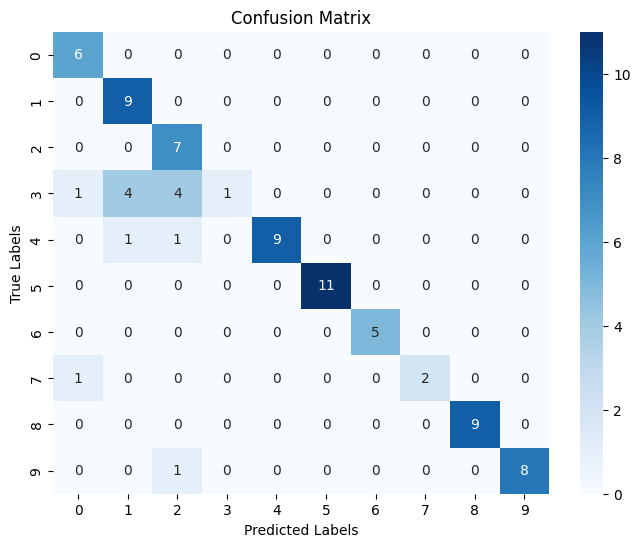

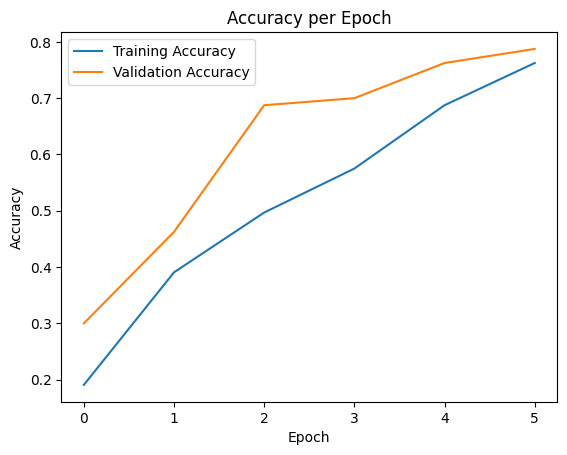

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.64      1.00      0.78         9
           2       0.54      1.00      0.70         7
           3       1.00      0.10      0.18        10
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         9
           9       1.00      0.89      0.94         9

    accuracy                           0.84        80
   macro avg       0.89      0.85      0.82        80
weighted avg       0.90      0.84      0.81        80



In [22]:
author_classifier.test_train(6)

We've reduced the max_length_doc parameter to 300 to assess the impact of lower token lengths on the model's performance.

In [30]:
author_classifier = AuthorClassification(docs_dir = 'norm_no_stop_word2',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=300,
                                         fold=5,
                                         initial_learning_rate= 0.01, 
                                         end_learning_rate=1e-4,
                                         batch_size=16)

test_len: 80, val_len: 80, train_len: 320


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
20/20 [==============================] - 20s 715ms/step - loss: 3.2289 - accuracy: 0.1969 - val_loss: 2.0694 - val_accuracy: 0.3625
Epoch 2/6
20/20 [==============================] - 12s 631ms/step - loss: 1.7870 - accuracy: 0.3406 - val_loss: 1.4103 - val_accuracy: 0.5250
Epoch 3/6
20/20 [==============================] - 13s 631ms/step - loss: 1.2887 - accuracy: 0.6031 - val_loss: 1.0999 - val_accuracy: 0.6625
Epoch 4/6
20/20 [==============================] - 13s 633ms/step - loss: 1.0806 - accuracy: 0.6625 - val_loss: 1.0947 - val_accuracy: 0.5625
Epoch 5/6
20/20 [==============================] - 13s 644ms/step - loss: 0.8909 - accuracy: 0.7312 - val_loss: 0.8952 - val_accuracy: 0.7625
Epoch 6/6
5/5 [==============================] - 2s 462ms/step - loss: 0.6349 - accuracy: 0.8000
Test Loss: 0.6349076628684998, Test Accuracy: 0.800000011920929
5/5 [==============================] - 4s 465ms/step


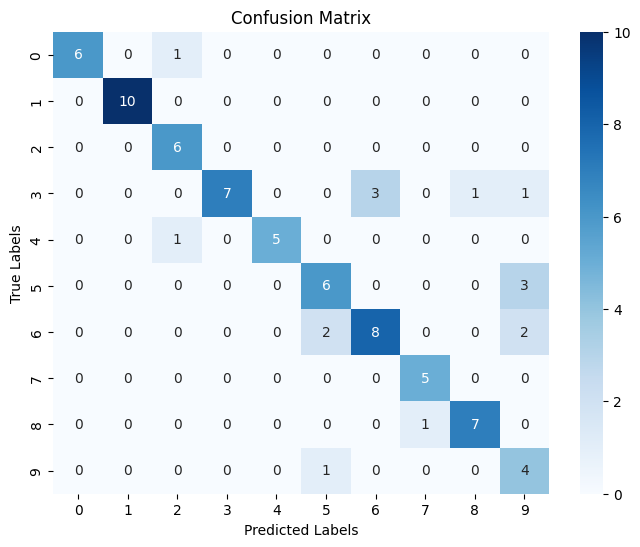

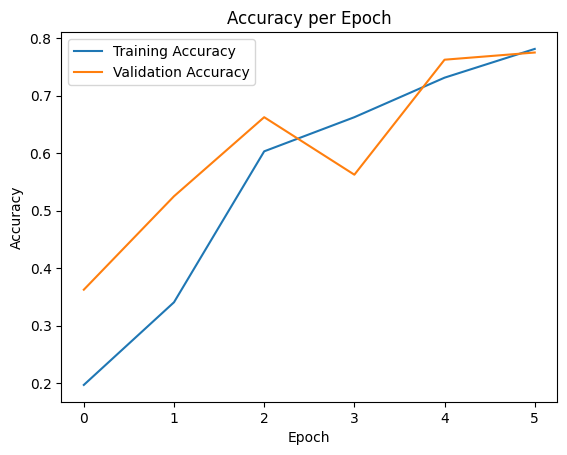

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86         6
           3       1.00      0.58      0.74        12
           4       1.00      0.83      0.91         6
           5       0.67      0.67      0.67         9
           6       0.73      0.67      0.70        12
           7       0.83      1.00      0.91         5
           8       0.88      0.88      0.88         8
           9       0.40      0.80      0.53         5

    accuracy                           0.80        80
   macro avg       0.83      0.83      0.81        80
weighted avg       0.84      0.80      0.81        80



In [27]:
author_classifier.test_train(5)

As observed, the model did not yield satisfactory results under the reduced max_length_doc parameter, indicating the importance of retaining a higher token length for improved performance.

### Traditional ML

Now, with the introduction of the AuthorClassificationTraditional class, we enable the training of datasets using a CNN-like architecture. This architecture begins with an input layer comprising 500 nodes, followed by a dense layer with 256 units and ReLU activation, providing increased model capacity for learning complex patterns. Subsequently, a dropout layer with a dropout rate of 0.1 is incorporated to prevent overfitting by randomly deactivating 10% of the units during training. Another dense layer with 50 units follows, further enhancing the model's ability to capture intricate relationships in the data. Finally, the output layer employs a softmax activation function to produce probabilities for each class. This setup is reminiscent of traditional machine learning methods employed previously, and our aim is to evaluate the performance of pretrained models within this framework to ascertain any potential accuracy improvements.

In [41]:
class AuthorClassificationTraditional:
  def __init__(self, docs_dir, model_name, max_docs_per_author=48, max_length_doc=500, fold=5, num_authors=10, batch_size=16, learning_rate=2e-5):
    self.docs_dir = get_docs_dir(docs_dir)
    self.max_docs_per_author = max_docs_per_author
    self.model_name = model_name
    self.max_length_doc = max_length_doc
    self.fold = fold
    self.num_authors = num_authors
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.docs, self.labels = self.load_data()
    
  def load_data(self):
    docs, labels = [], []
    lock = threading.Lock()

    def process_author(author_id):
        author_path = os.path.join(self.docs_dir, str(author_id))
        chosen_files = np.random.choice(glob.glob(os.path.join(author_path, 'doc_*.txt')),
                                          size=self.max_docs_per_author, replace=False)
        author_docs, author_labels = [], []
        for file_path in chosen_files:
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                author_docs += [content]
                author_labels += [author_id - 1]
        with lock:
            docs.extend(author_docs)
            labels.extend(author_labels)

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_author, author_id) for author_id in range(1, self.num_authors + 1)]
        concurrent.futures.wait(futures)
        
    docs = self.preprocess_data(docs)

    shuffled_indices = np.random.permutation(len(docs))
    docs = np.array(docs)[shuffled_indices]
    labels = np.array(labels)[shuffled_indices]

    return docs, labels

  def preprocess_data(self, docs):
    tokenizer = BertTokenizer.from_pretrained(self.model_name)
    return np.array([tokenizer.encode(text, add_special_tokens=True, max_length=self.max_length_doc, truncation=True) for text in docs])

  def create_model(self):
    input_layer = tf.keras.layers.Input(shape=(self.max_length_doc,), dtype=tf.int32)
    dense_layer = tf.keras.layers.Dense(256, activation='relu')(input_layer)
    dropout_layer = tf.keras.layers.Dropout(0.1)(dense_layer)
    dense_layer_t = tf.keras.layers.Dense(50)(dropout_layer)
    output_layer = tf.keras.layers.Dense(self.num_authors, activation='softmax')(dense_layer_t)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

  def train_model(self, model, train_texts, train_labels, val_texts, val_labels, epochs):
    train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).shuffle(100).batch(self.batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(self.batch_size)
            
    optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
      
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
    return model, history

  def evaluate_model(self, model, test_texts, test_labels):
    test_dataset = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(self.batch_size)
    test_loss, test_accuracy = model.evaluate(test_dataset)
    return test_loss, test_accuracy

  def test_train(self, epochs):
    tf.keras.backend.clear_session()
    gc.collect()
    train_texts, test_texts, train_labels, test_labels = train_test_split(self.docs, self.labels, test_size=1/6, random_state=45)
    train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=45)
    print(f"test_len: {len(test_labels)}, val_len: {len(val_labels)}, train_len: {len(train_labels)}")

    model = self.create_model()
    display(model.summary())
    model, history = self.train_model(model, train_texts, train_labels, val_texts, val_labels, epochs)
    test_dataset = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(self.batch_size)
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)

    plot_confusion_matrix(test_labels, predicted_labels)
    plot_accuracy_per_epoch(history)
    print_classification_report(test_labels, predicted_labels)
    del model
    
  def cross_validate(self, epochs=10):
    fold_size = len(self.labels) // self.fold
    accuracies = []

    for i in range(self.fold):
      tf.keras.backend.clear_session()
      gc.collect()
      start_index = i * fold_size
      end_index = min(start_index + fold_size, len(self.labels))
    
      val_texts = self.docs[start_index:end_index]
      val_labels = self.labels[start_index:end_index]
      train_texts = np.concatenate((self.docs[:start_index], self.docs[end_index:]), axis=0)
      train_labels = np.concatenate((self.labels[:start_index], self.labels[end_index:]), axis=0)
      model = self.create_model()
      print(f"Fold {i+1}/{self.fold}")

      model, history = self.train_model(model, train_texts, train_labels, val_texts, val_labels, epochs=epochs)
    
      test_loss, test_accuracy = self.evaluate_model(model, val_texts, val_labels)
      accuracies.append(test_accuracy)
      print(f"Validation Accuracy: {test_accuracy}")
      del model

    print("Mean Accuracy:", np.mean(accuracies))

In [42]:
author_classifier = AuthorClassificationTraditional(docs_dir = 'norm_no_stop_word2',
                                         model_name = 'HooshvareLab/bert-fa-base-uncased',
                                         max_docs_per_author=48,
                                         max_length_doc=500,
                                         fold=5,
                                         learning_rate= 2e-5, 
                                         batch_size=16)

test_len: 80, val_len: 80, train_len: 320
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 256)               128256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                12850     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 141616 (553.19 KB)
Trainable params: 141616 (553.19 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________

None

Epoch 1/200
20/20 [==============================] - 1s 5ms/step - loss: 49517.5898 - accuracy: 0.1063 - val_loss: 43418.5977 - val_accuracy: 0.0750
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 42120.6914 - accuracy: 0.1312 - val_loss: 38136.1641 - val_accuracy: 0.0875
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 39145.8008 - accuracy: 0.1156 - val_loss: 37148.9922 - val_accuracy: 0.0875
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 37062.9531 - accuracy: 0.1031 - val_loss: 37068.6016 - val_accuracy: 0.0875
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 35321.9688 - accuracy: 0.1219 - val_loss: 36784.9297 - val_accuracy: 0.0875
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 34889.6406 - accuracy: 0.1125 - val_loss: 36062.1758 - val_accuracy: 0.0750
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 34192.3633 - accuracy: 0.1187 - v

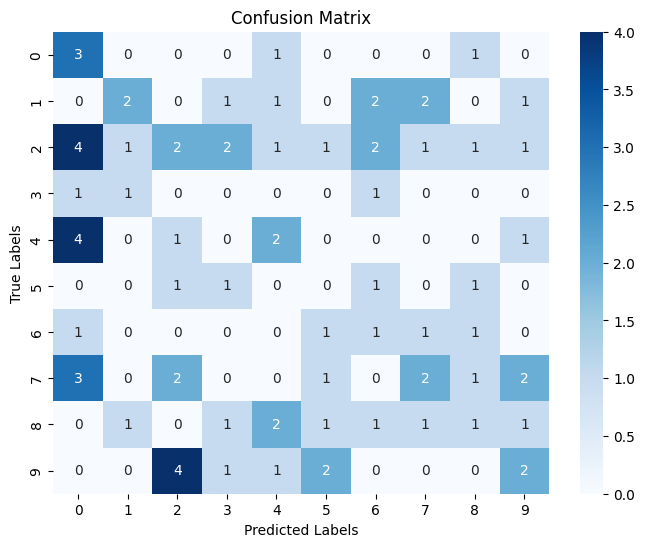

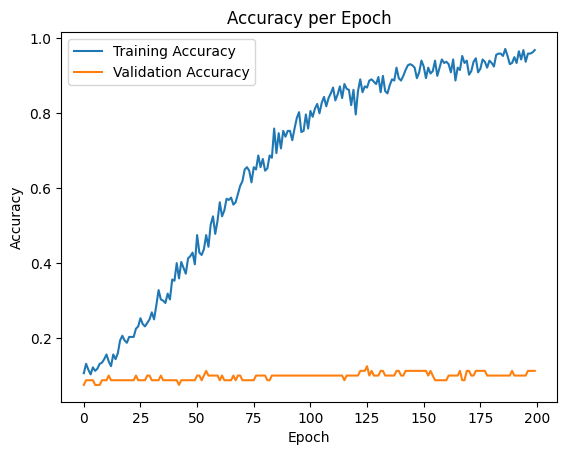

              precision    recall  f1-score   support

           0       0.19      0.60      0.29         5
           1       0.40      0.22      0.29         9
           2       0.20      0.12      0.15        16
           3       0.00      0.00      0.00         3
           4       0.25      0.25      0.25         8
           5       0.00      0.00      0.00         4
           6       0.12      0.20      0.15         5
           7       0.29      0.18      0.22        11
           8       0.17      0.11      0.13         9
           9       0.25      0.20      0.22        10

    accuracy                           0.19        80
   macro avg       0.19      0.19      0.17        80
weighted avg       0.22      0.19      0.19        80



In [43]:
author_classifier.test_train(200)

Despite employing varied architectures and extensive training epochs, it's evident from the disparity between validation and training accuracies that traditional machine learning approaches, including different architectures, struggle to generalize effectively, as depicted by the low validation accuracy compared to near-perfect training accuracy. This highlights the limited efficacy of traditional ML methods when compared to pretrained models.